In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
print(tf.__version__)

2.0.0


In [63]:
X = [] # Image data
y = [] # Labels

In [64]:
TRAIN_ROOT_PATH = "/Users/sonu/work/aiml/src/datasets/action-detection/"
TRAIN_FOLDER_LIST = TRAIN_ROOT_PATH + "train.csv"
TRAIN_FOLDER_PATH = TRAIN_ROOT_PATH + "Project_data/train"

In [68]:
# Load training indexes
df_folder_index = pd.read_csv(TRAIN_FOLDER_LIST)
df_folder_index.head()
df_folder_index.shape

(663, 3)

In [74]:
# /Users/sonu/work/aiml/src/datasets/action-detection/Project_data/train
def scan_files(path, foldername):
    listed_files = []
    for root, dirs, files in os.walk(path + "/" + foldername):
        for name in files:
            path = os.path.join(root, name)
            if path.endswith("png"):
                # We want only the images
                listed_files.append(path)
    return listed_files

# Test function
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

In [67]:
num_images = 0
for index, row in df_folder_index.iterrows():
    # Images
    imagepaths = [] # Image paths    
    
#     print("Loading folder: ", index)
    
    # Class name / folder
    class_name  = row['Class']
    class_index = row['Class Index']
    imagepaths = scan_files(TRAIN_FOLDER_PATH, row['FolderName'])
    # Load each image into X[] & y[]
    for image in imagepaths:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (240,240))
        # Build training example, label
        num_images = num_images + 1
        X.append(img)
        y.append(class_index)

Loading folder:  0
Loading folder:  1
Loading folder:  2
Loading folder:  3
Loading folder:  4
Loading folder:  5
Loading folder:  6
Loading folder:  7
Loading folder:  8
Loading folder:  9
Loading folder:  10
Loading folder:  11
Loading folder:  12
Loading folder:  13
Loading folder:  14
Loading folder:  15
Loading folder:  16
Loading folder:  17
Loading folder:  18
Loading folder:  19
Loading folder:  20
Loading folder:  21
Loading folder:  22
Loading folder:  23
Loading folder:  24
Loading folder:  25
Loading folder:  26
Loading folder:  27
Loading folder:  28
Loading folder:  29
Loading folder:  30
Loading folder:  31
Loading folder:  32
Loading folder:  33
Loading folder:  34
Loading folder:  35
Loading folder:  36
Loading folder:  37
Loading folder:  38
Loading folder:  39
Loading folder:  40
Loading folder:  41
Loading folder:  42
Loading folder:  43
Loading folder:  44
Loading folder:  45
Loading folder:  46
Loading folder:  47
Loading folder:  48
Loading folder:  49
Loading fo

Loading folder:  398
Loading folder:  399
Loading folder:  400
Loading folder:  401
Loading folder:  402
Loading folder:  403
Loading folder:  404
Loading folder:  405
Loading folder:  406
Loading folder:  407
Loading folder:  408
Loading folder:  409
Loading folder:  410
Loading folder:  411
Loading folder:  412
Loading folder:  413
Loading folder:  414
Loading folder:  415
Loading folder:  416
Loading folder:  417
Loading folder:  418
Loading folder:  419
Loading folder:  420
Loading folder:  421
Loading folder:  422
Loading folder:  423
Loading folder:  424
Loading folder:  425
Loading folder:  426
Loading folder:  427
Loading folder:  428
Loading folder:  429
Loading folder:  430
Loading folder:  431
Loading folder:  432
Loading folder:  433
Loading folder:  434
Loading folder:  435
Loading folder:  436
Loading folder:  437
Loading folder:  438
Loading folder:  439
Loading folder:  440
Loading folder:  441
Loading folder:  442
Loading folder:  443
Loading folder:  444
Loading folde

In [69]:
print("Num Images: ", num_images)

Num Images:  19890


In [71]:
X = np.array(X, dtype='uint8')
X = X.reshape(num_images, 240, 240, 1)
y = np.array(y)

In [72]:
print("images loaded: ", len(X))
print("labels loaded: ", len(y))

images loaded:  19890
labels loaded:  19890


(120, 160)


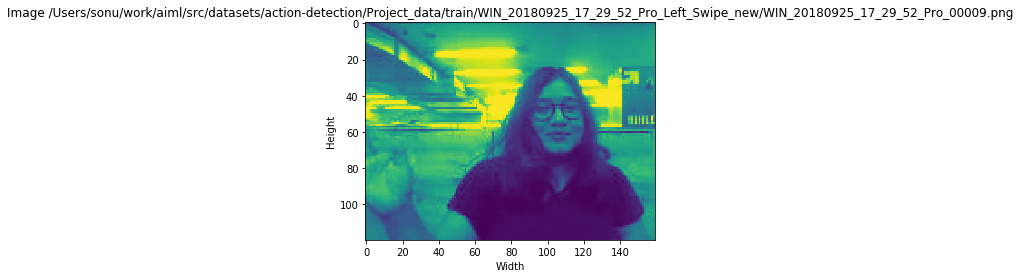

In [75]:
# Test image conversion
plot_image("/Users/sonu/work/aiml/src/datasets/action-detection/Project_data/train/WIN_20180925_17_29_52_Pro_Left_Swipe_new/WIN_20180925_17_29_52_Pro_00009.png")

In [76]:
# Split train and test
ts = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [77]:
# Train the model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [78]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(240, 240, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [81]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model.fit(X_train,
          y_train,
          epochs=3,
          batch_size=64,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 15912 samples, validate on 3978 samples
Epoch 1/3
15912/15912 [==============================] - 987s 62ms/step - loss: 0.2103 - accuracy: 0.9279 - val_loss: 0.0708 - val_accuracy: 0.9756
Epoch 2/3
15912/15912 [==============================] - 993s 62ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.0099 - val_accuracy: 0.9982
Epoch 3/3
15912/15912 [==============================] - 1023s 64ms/step - loss: 5.9068e-04 - accuracy: 0.9999 - val_loss: 0.0059 - val_accuracy: 0.9987


In [84]:
model.save('gesture_recognition_model.h5')

In [86]:
# Evaluate the model accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

3978/3978 [==============================] - 93s 23ms/step


In [87]:
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

Test accuracy: 99.87%
